In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Function to capture image using webcam
def capture_image(sequence_number, timestamp):
    ret, frame = cap.read()
    if ret:
        image_filename = f"{sequence_number}_{timestamp}.jpg"
        cv2.imwrite(image_filename, frame)
        print(f"Captured image saved as {image_filename}")
        return image_filename
    return None

import random
def receive_data():
    return [random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)]

# Function to save data and create a graph
def save_data_and_graph(sequence_number, data_points, timestamp):
    # Convert data to a DataFrame
    df = pd.DataFrame(data_points, columns=['Acc_X', 'Acc_Y', 'Acc_Z'])
    csv_filename = f"{sequence_number}_{timestamp}.csv"
    
    # Save data to CSV
    df.to_csv(csv_filename, index=False)
    print(f"Data saved to {csv_filename}")
    
    # Create and save the graph
    plt.figure(figsize=(10, 6))
    plt.plot(df['Acc_X'], label='Acc_X')
    plt.plot(df['Acc_Y'], label='Acc_Y')
    plt.plot(df['Acc_Z'], label='Acc_Z')
    plt.legend()
    plt.title(f"Accelerometer Data - {timestamp}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Acceleration")
    plt_filename = f"{sequence_number}_{timestamp}.png"
    plt.savefig(plt_filename)
    plt.close()
    print(f"Graph saved as {plt_filename}")
    
    return csv_filename, plt_filename

# Function to record activity based on accelerometer data
def record_activity(sequence_number, activity_type, data_points, timestamp):
    # Capture image and save data
    image_filename = capture_image(sequence_number, timestamp)
    if image_filename:
        csv_filename, plt_filename = save_data_and_graph(sequence_number, data_points, timestamp)
        
        # For this example, we print an update message
        print(f"Updated dashboard with graph {plt_filename} and image {image_filename}")
        
        # Return file information for annotation
        return image_filename, csv_filename, activity_type
    return None, None, None

# Main function to run the data collection and monitoring
def run_activity_monitoring(duration_minutes=10):
    sequence_number = 1
    start_time = time.time()
    end_time = start_time + (duration_minutes * 60)
    
    # Placeholder activity simulation (you can replace with real activities)
    activities = {0: "No activity", 1: "Waving", 2: "Shaking"}
    
    annotations = []
    
    while time.time() < end_time:
        data_points = []
        
        # Simulate an activity (you can automate this or manually label)
        activity_type = random.choice([0, 1, 2])  # Simulating random activities
        print(f"Performing {activities[activity_type]}...")
        
        # Collect data for 10 seconds
        collection_start = time.time()
        while time.time() - collection_start < 10:
            data_points.append(receive_data())
            time.sleep(0.1)  # Collect data every 0.1 seconds for higher resolution
        
        # Generate timestamp
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        
        # Record the activity and save the data
        image_filename, csv_filename, activity_type = record_activity(sequence_number, activity_type, data_points, timestamp)
        
        # Add entry to annotations
        if image_filename:
            annotations.append([image_filename, activity_type])
        
        sequence_number += 1
    
    # Save annotation file
    save_annotation_file(annotations)

# Function to create annotation file
def save_annotation_file(annotations):
    with open('activity_annotations.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['filename', 'activity_label'])  # Header
        for annotation in annotations:
            writer.writerow(annotation)
    print("Annotation file created as activity_annotations.csv")

# Main execution
if __name__ == "__main__":
    try:
        run_activity_monitoring(duration_minutes=30)
    finally:
        cap.release()
        print("Activity monitoring completed.")


Performing Waving...
Captured image saved as 1_20240910110449.jpg
Data saved to 1_20240910110449.csv
Graph saved as 1_20240910110449.png
Updated dashboard with graph 1_20240910110449.png and image 1_20240910110449.jpg
Performing No activity...
Captured image saved as 2_20240910110459.jpg
Data saved to 2_20240910110459.csv
Graph saved as 2_20240910110459.png
Updated dashboard with graph 2_20240910110459.png and image 2_20240910110459.jpg
Performing Waving...
Captured image saved as 3_20240910110510.jpg
Data saved to 3_20240910110510.csv
Graph saved as 3_20240910110510.png
Updated dashboard with graph 3_20240910110510.png and image 3_20240910110510.jpg
Performing No activity...
Captured image saved as 4_20240910110520.jpg
Data saved to 4_20240910110520.csv
Graph saved as 4_20240910110520.png
Updated dashboard with graph 4_20240910110520.png and image 4_20240910110520.jpg
Performing Shaking...
Captured image saved as 5_20240910110530.jpg
Data saved to 5_20240910110530.csv
Graph saved as 5

KeyboardInterrupt: 

In [1]:
import csv
import os

# Function to annotate the images with activities
def annotate_images(image_files):
    annotations = []
    
    # Iterate through the image files
    for img_file in image_files:
        print(f"Displaying {img_file} for annotation")
        
        # Open the image (replace with your method to display the image)
        os.system(f'open {img_file}')  # macOS-specific command to open image in Preview
        
        # Ask for user input
        activity_label = input("Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking): ")
        
        # Add to annotations list
        annotations.append([img_file, activity_label])
    
    return annotations

# Get list of image files in the directory
image_files = [f for f in os.listdir('.') if f.endswith('.jpg')]

# Annotate the images
annotations = annotate_images(image_files)

# Save annotations to CSV file
with open('activity_annotations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'activity_label'])  # Write header
    writer.writerows(annotations)  # Write annotation rows

print("Annotation completed and saved to activity_annotations.csv")


Displaying 13_20240910110652.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 6_20240910110540.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 2_20240910110459.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 18_20240910110743.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 1_20240910110449.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 9_20240910110611.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 5_20240910110530.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 10_20240910110621.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 22_20240910110824.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 14_20240910110702.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 20_20240910110803.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 16_20240910110723.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 24_20240910110844.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 23_20240910110834.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 11_20240910110632.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 4_20240910110520.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 21_20240910110814.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 25_20240910110854.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 17_20240910110733.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 15_20240910110712.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 7_20240910110550.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  1


Displaying 19_20240910110753.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 12_20240910110642.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Displaying 8_20240910110601.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  0


Displaying 3_20240910110510.jpg for annotation


Enter activity label (0 = No activity, 1 = Waving, 2 = Shaking):  2


Annotation completed and saved to activity_annotations.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the annotation CSV file
annotations = pd.read_csv('activity_annotations.csv')

# Print out the first few rows to verify
print(annotations.head())


                filename  activity_label
0  13_20240910110652.jpg               0
1   6_20240910110540.jpg               1
2   2_20240910110459.jpg               2
3  18_20240910110743.jpg               2
4   1_20240910110449.jpg               1


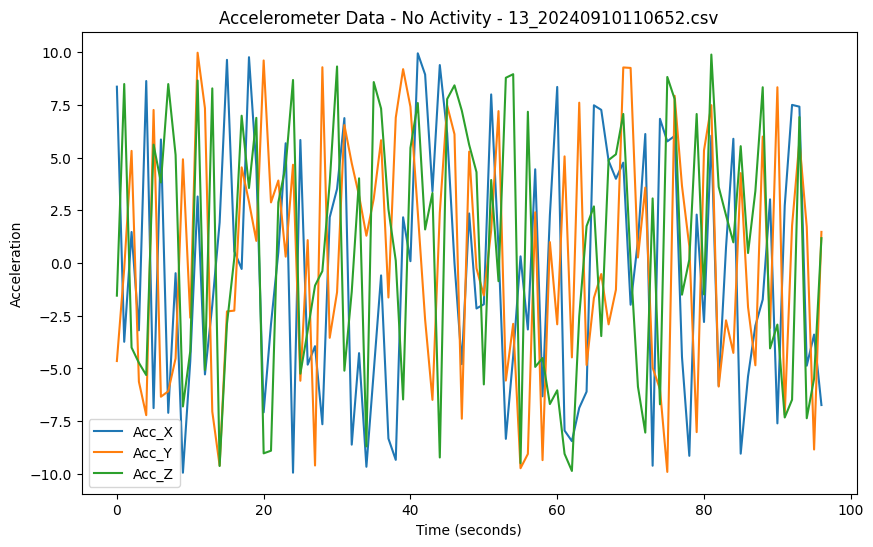

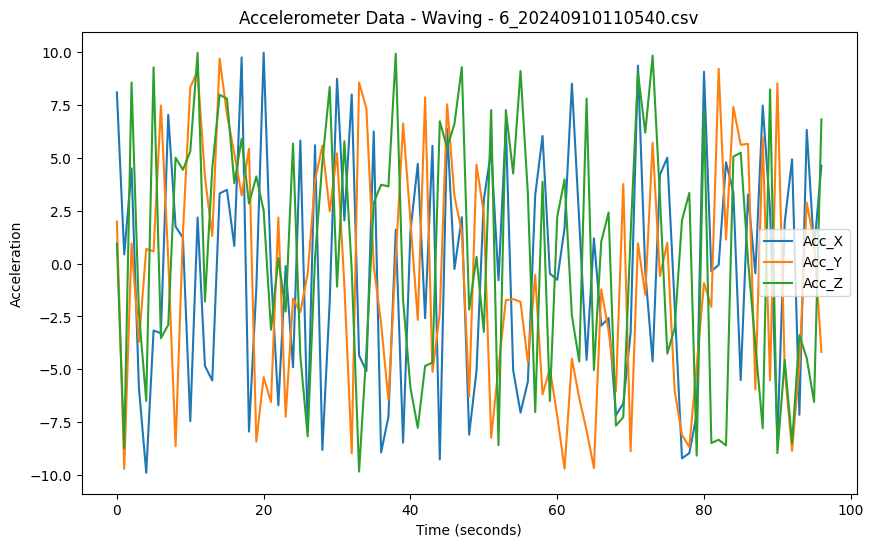

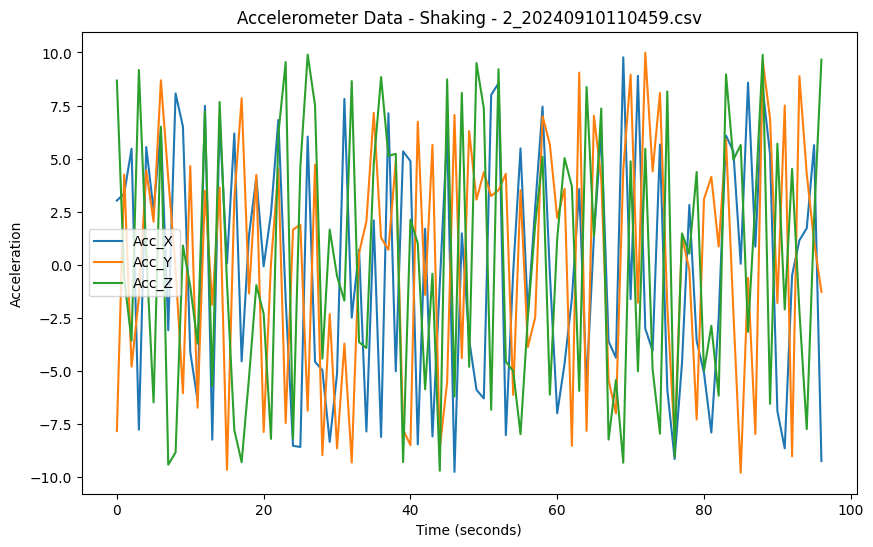

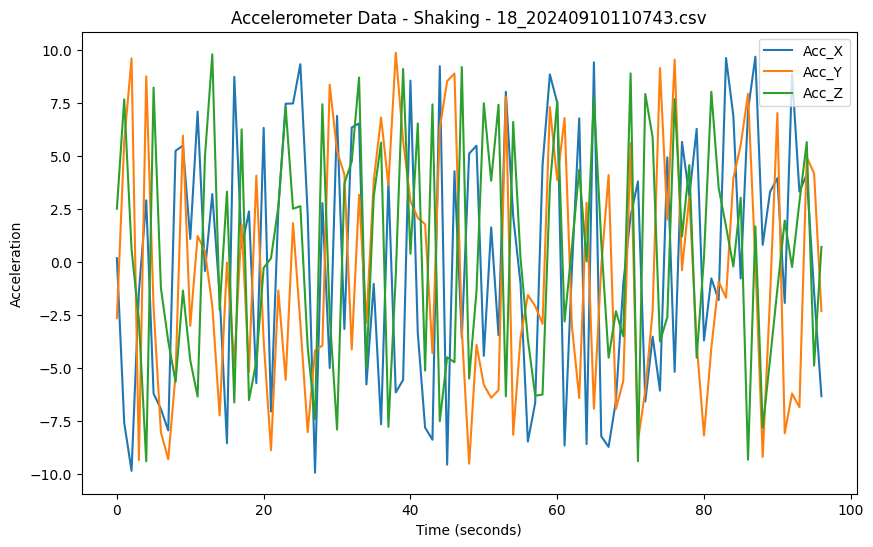

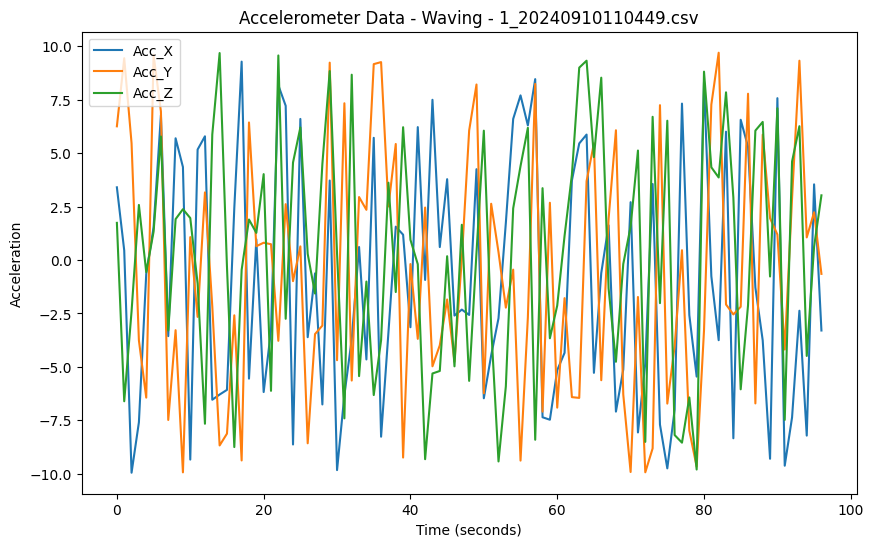

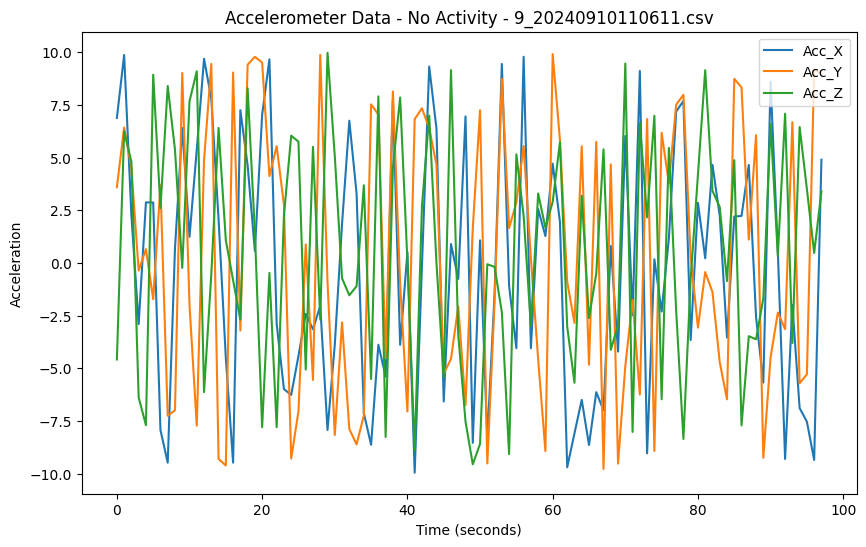

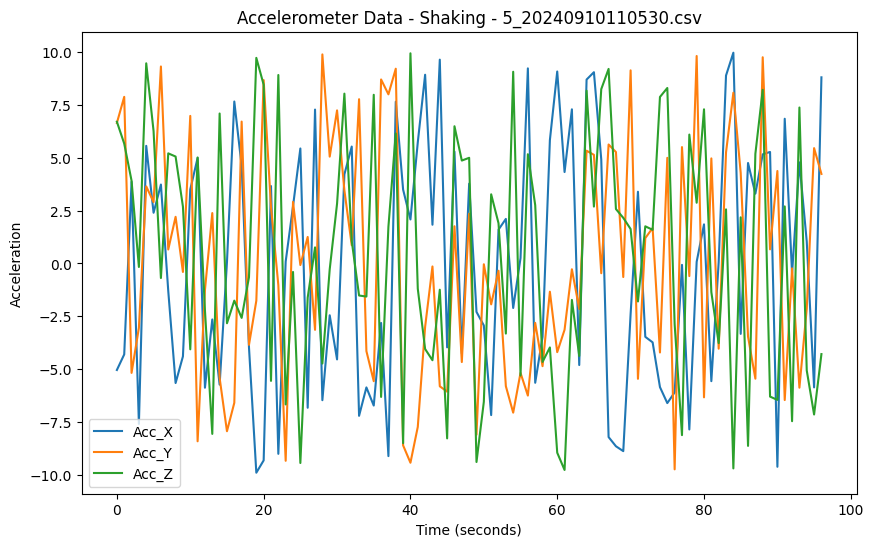

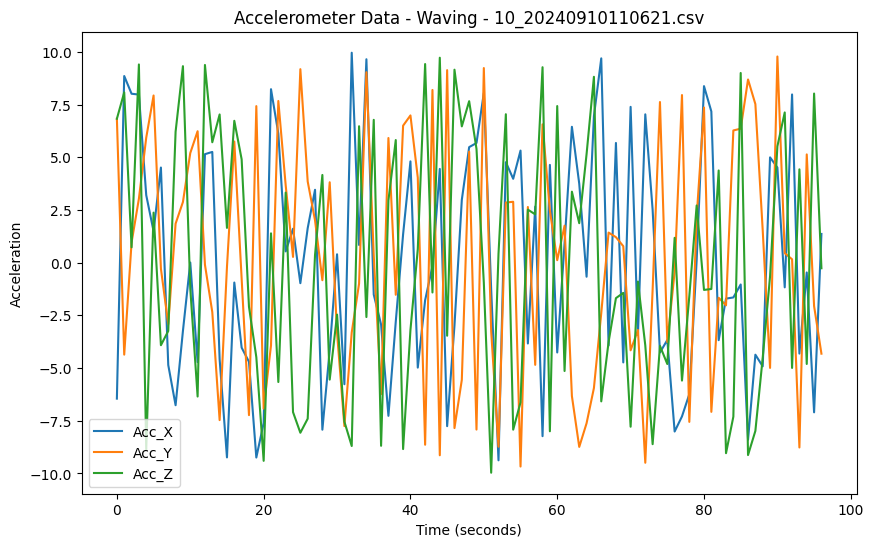

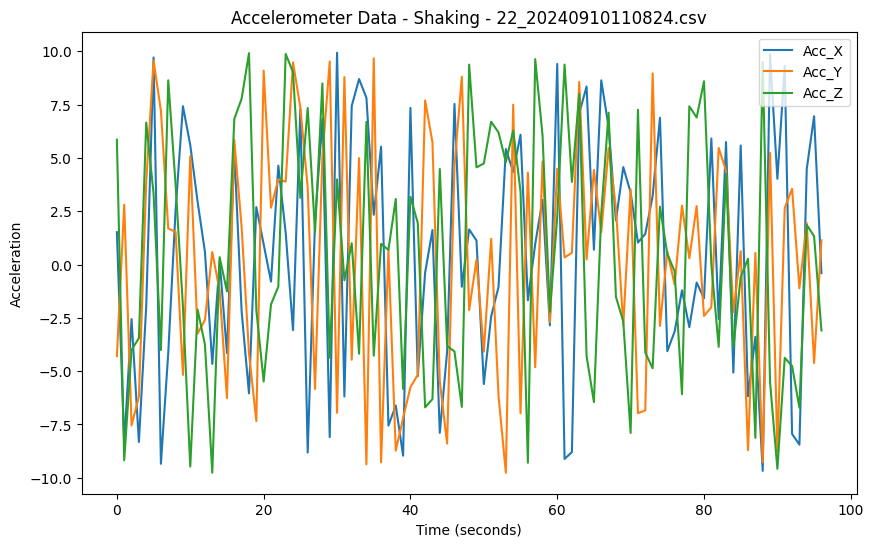

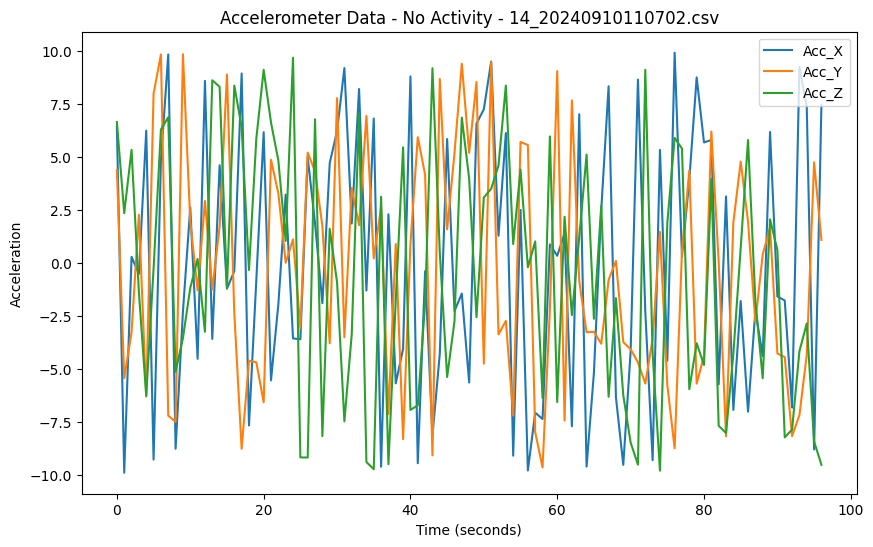

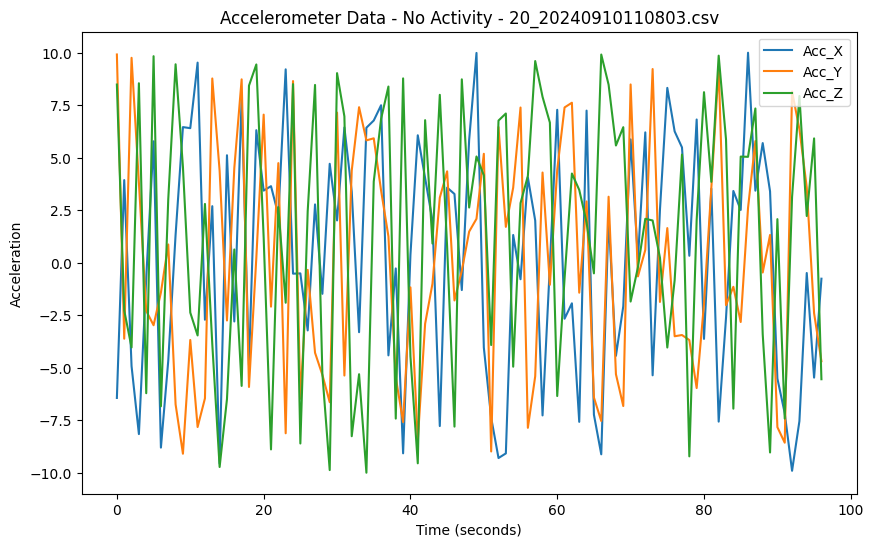

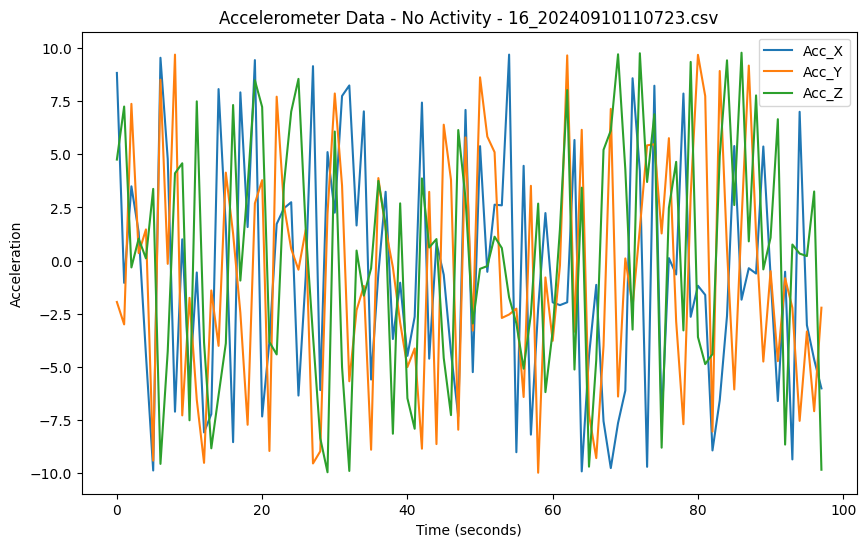

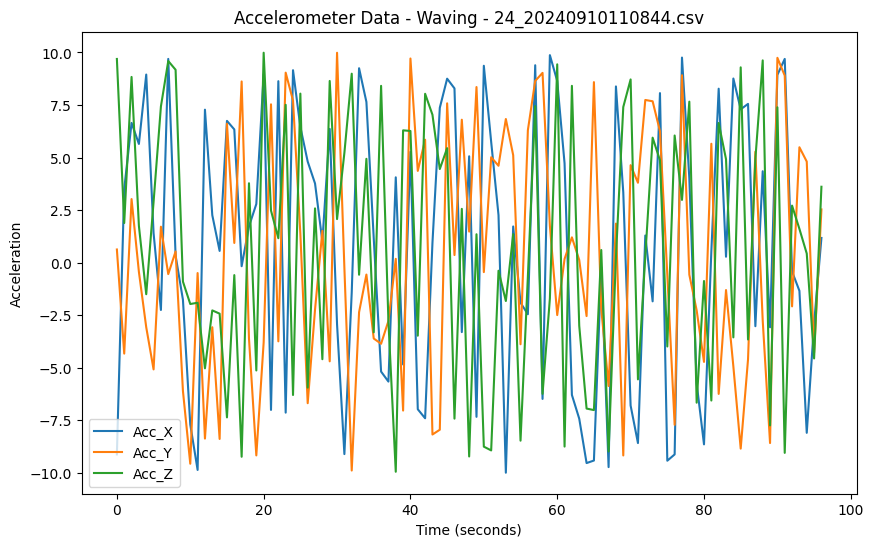

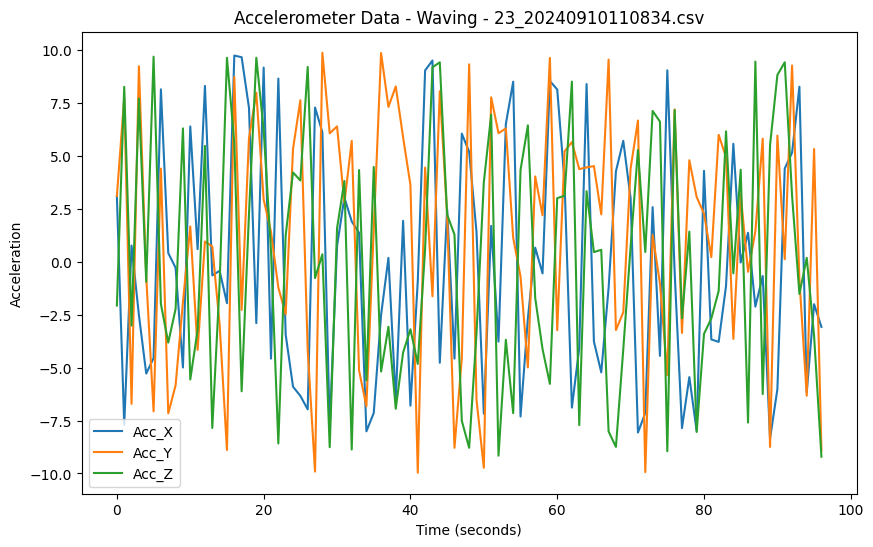

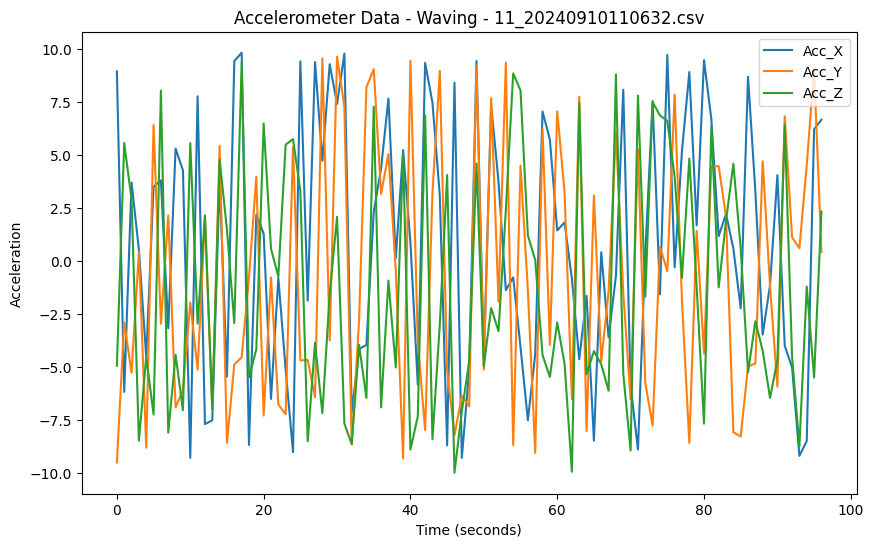

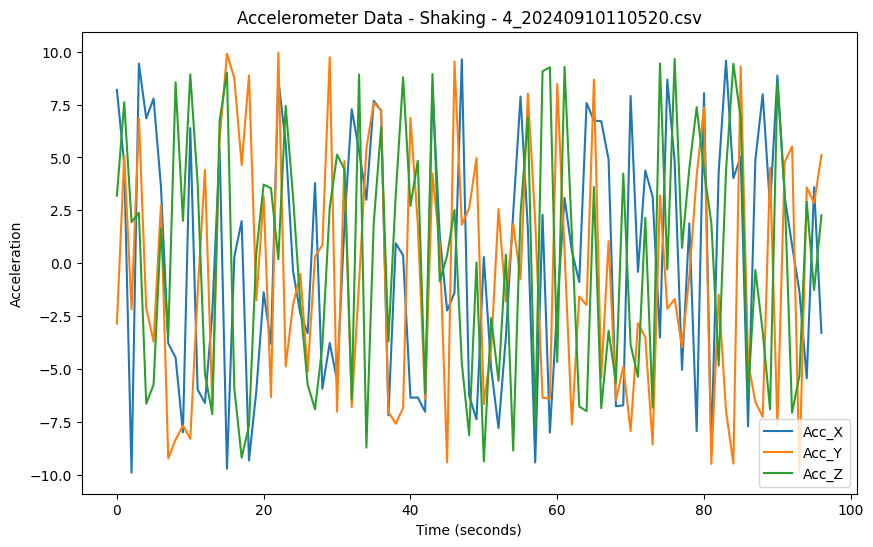

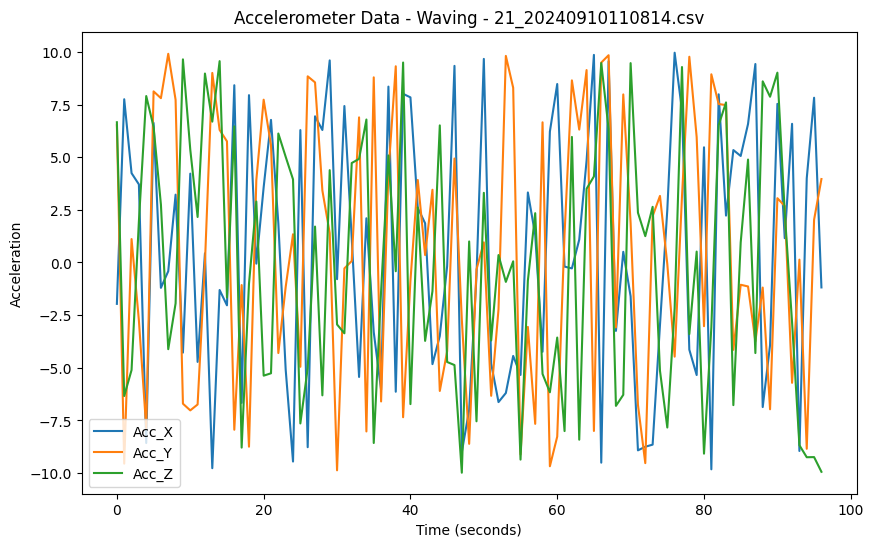

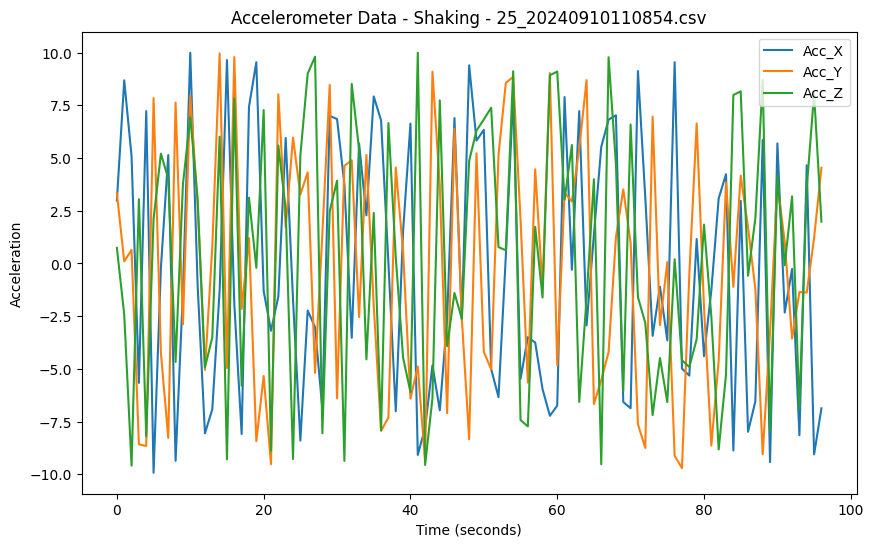

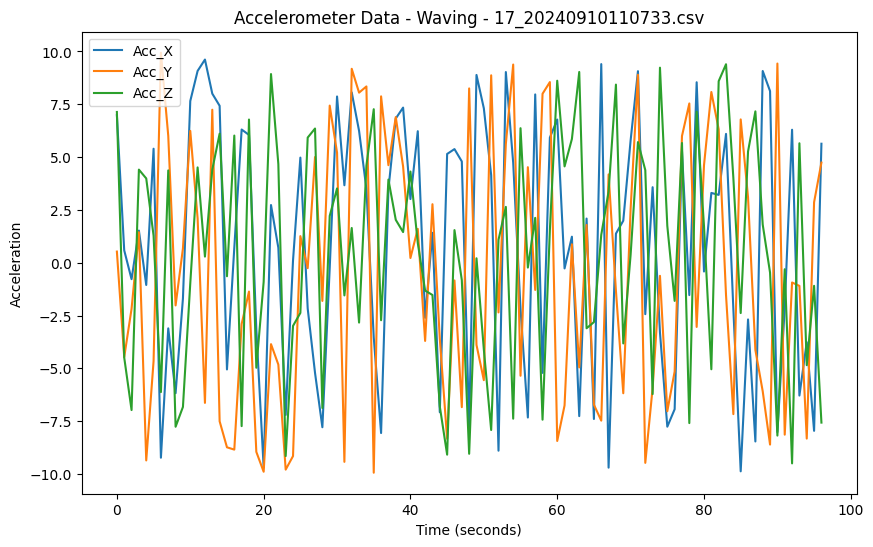

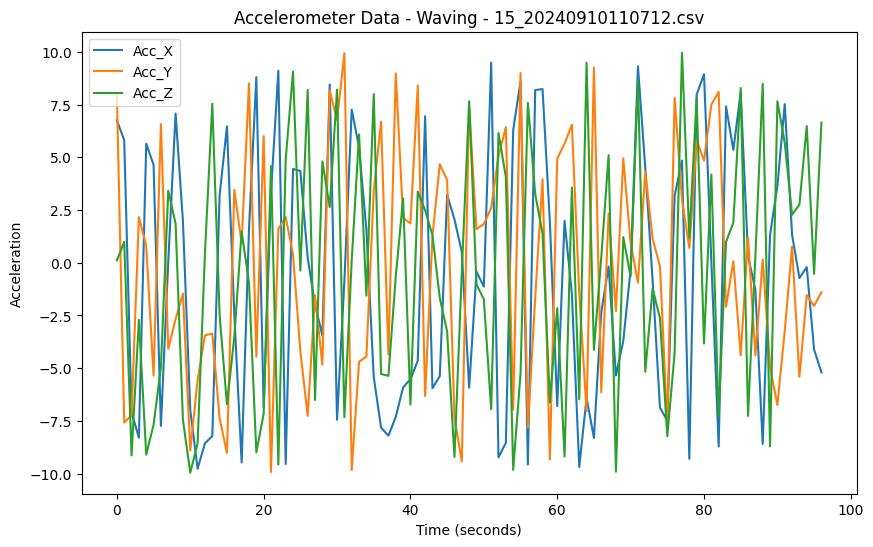

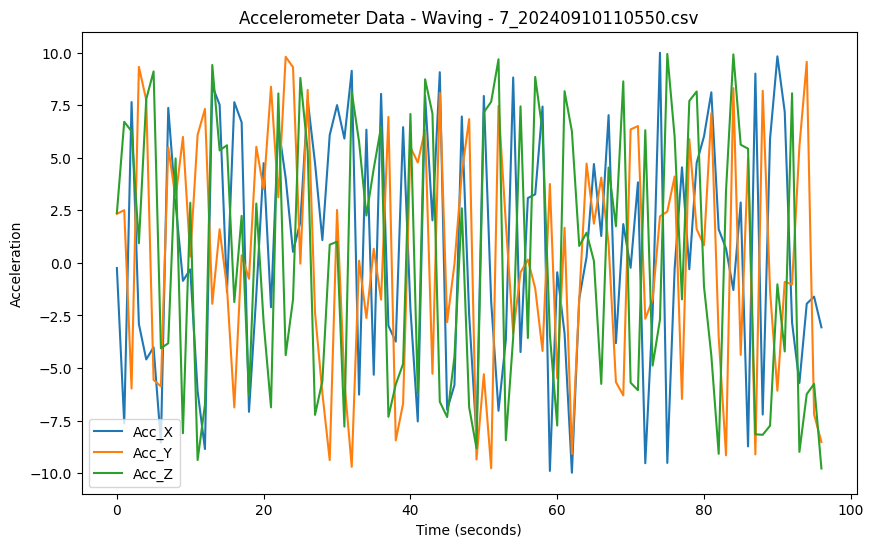

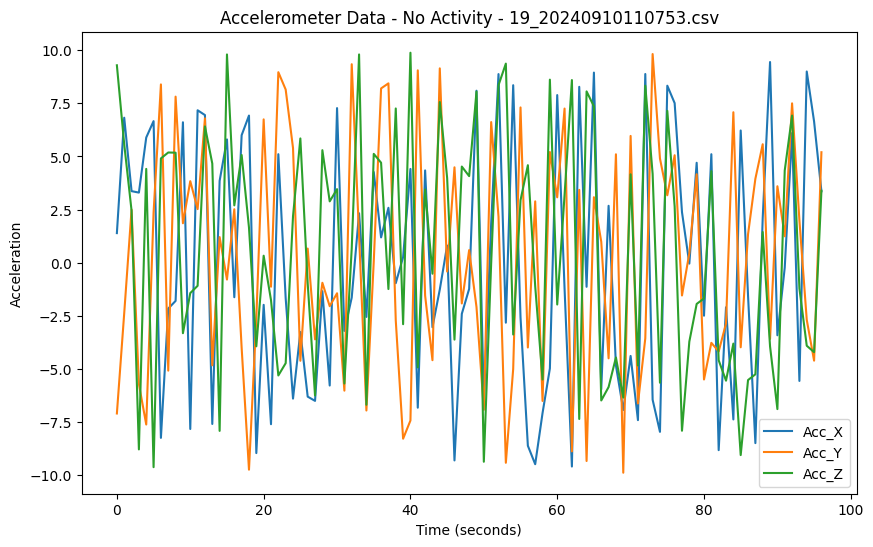

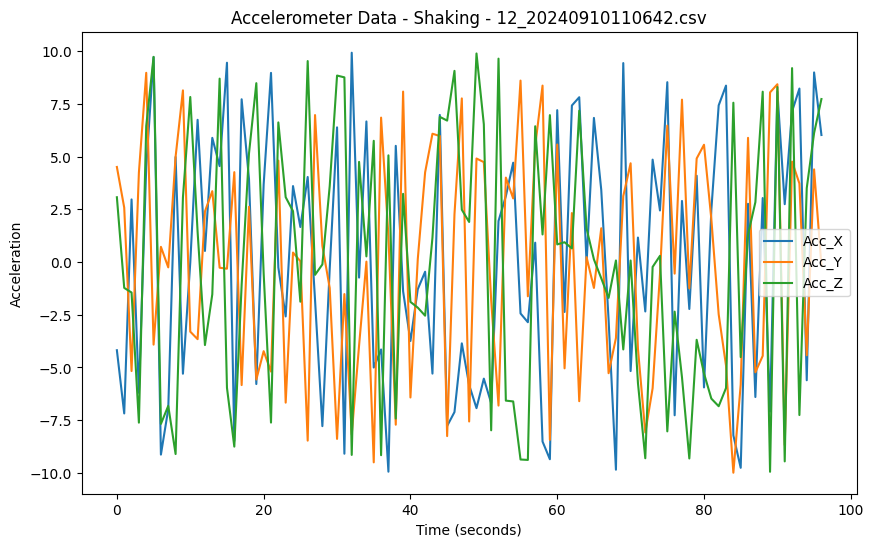

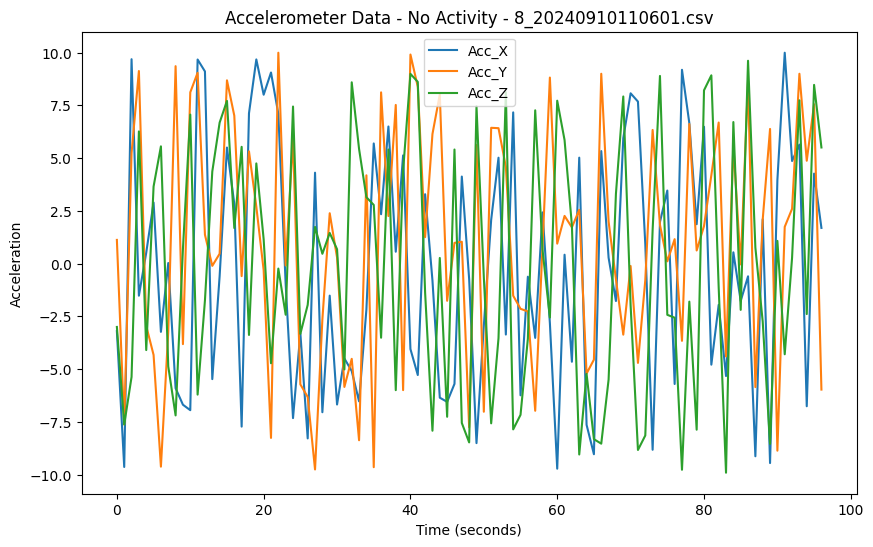

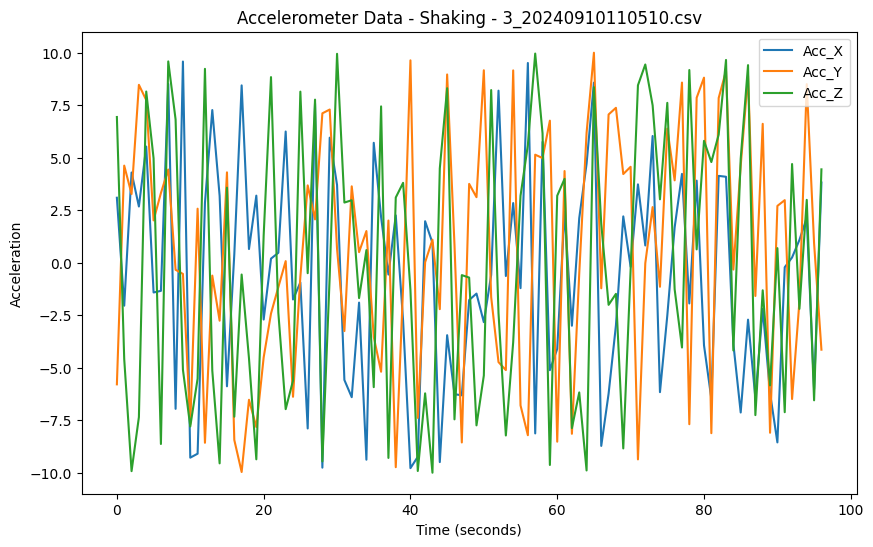

In [3]:
def plot_activity_data(file, activity_label):
    # Load the accelerometer data CSV file
    df = pd.read_csv(file)
    
    # Plot accelerometer data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Acc_X'], label='Acc_X')
    plt.plot(df['Acc_Y'], label='Acc_Y')
    plt.plot(df['Acc_Z'], label='Acc_Z')
    plt.legend()
    
    # Set plot title based on activity label
    activity_title = "No Activity" if activity_label == 0 else "Waving" if activity_label == 1 else "Shaking"
    plt.title(f"Accelerometer Data - {activity_title} - {file}")
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("Acceleration")
    plt.show()

# Iterate through the annotations and plot data for each file
for index, row in annotations.iterrows():
    csv_file = row['filename'].replace('.jpg', '.csv')  # Find corresponding CSV file
    if os.path.exists(csv_file):  # Check if the CSV file exists
        plot_activity_data(csv_file, row['activity_label'])
